Using file: C:\Users\abhin\Downloads\heart_disease (3).xlsx

Sheets found: ['Description', 'Heart_disease']

--- Sheet: 'Description' (shape (12, 2)) ---


,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
5,restecg,"ecg observation at resting condition, -- Val..."


dtypes: {'age': dtype('O'), 'Age in years': dtype('O')}

--- Sheet: 'Heart_disease' (shape (908, 13)) ---


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
5,66,Male,asymptomatic,160,228,False,lv hypertrophy,138,False,2.3,upsloping,fixed defect,0


dtypes: {'age': dtype('int64'), 'sex': dtype('O'), 'cp': dtype('O'), 'trestbps': dtype('int64'), 'chol': dtype('int64'), 'fbs': dtype('bool'), 'restecg': dtype('O'), 'thalch': dtype('int64'), 'exang': dtype('O'), 'oldpeak': dtype('float64'), 'slope': dtype('O'), 'thal': dtype('O'), 'num': dtype('int64')}

Selected sheet: Heart_disease
Reason: auto-picked because it has binary column(s): ['sex', 'fbs']
Selected shape: (908, 13)


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
5,66,Male,asymptomatic,160,228,False,lv hypertrophy,138,False,2.3,upsloping,fixed defect,0



Column names: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'thal', 'num']

Dtypes:


age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object


After coercion, dtypes:


age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

Auto-detected binary column as target: sex

Final target column being used: sex
Target distribution:


sex
Male      718
Female    190
Name: count, dtype: int64


Final feature matrix shape: (908, 12)
Example features (first 5 cols):


,age,cp,trestbps,chol,fbs
0,63,3,145,233,True
1,41,1,135,203,False
2,57,0,140,192,False
3,52,3,118,186,False
4,57,0,110,201,False



Train/Test shapes: (726, 12) (182, 12)

Accuracy: 0.7253

Confusion Matrix:
 [[  8  30]
 [ 20 124]]

Classification Report:
               precision    recall  f1-score   support

      Female       0.29      0.21      0.24        38
        Male       0.81      0.86      0.83       144

    accuracy                           0.73       182
   macro avg       0.55      0.54      0.54       182
weighted avg       0.70      0.73      0.71       182



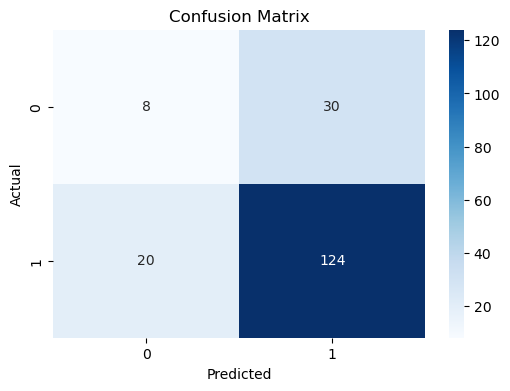


Feature importances:


,feature,importance
11,num,0.362479
8,oldpeak,0.165892
2,trestbps,0.146179
3,chol,0.121049
6,thalch,0.101492
10,thal,0.067330
9,slope,0.023496
0,age,0.012083
1,cp,0.000000
4,fbs,0.000000


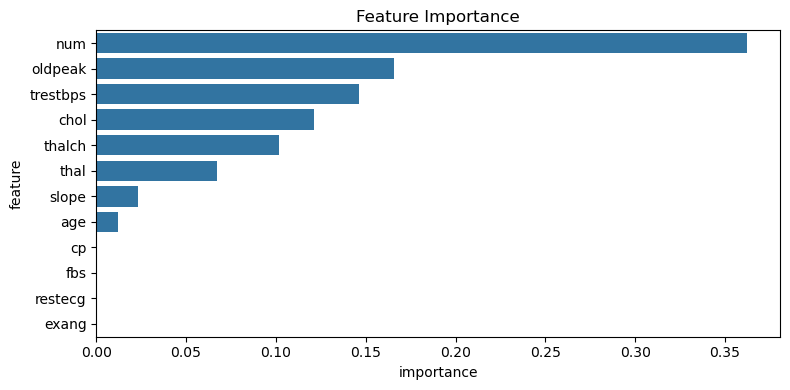

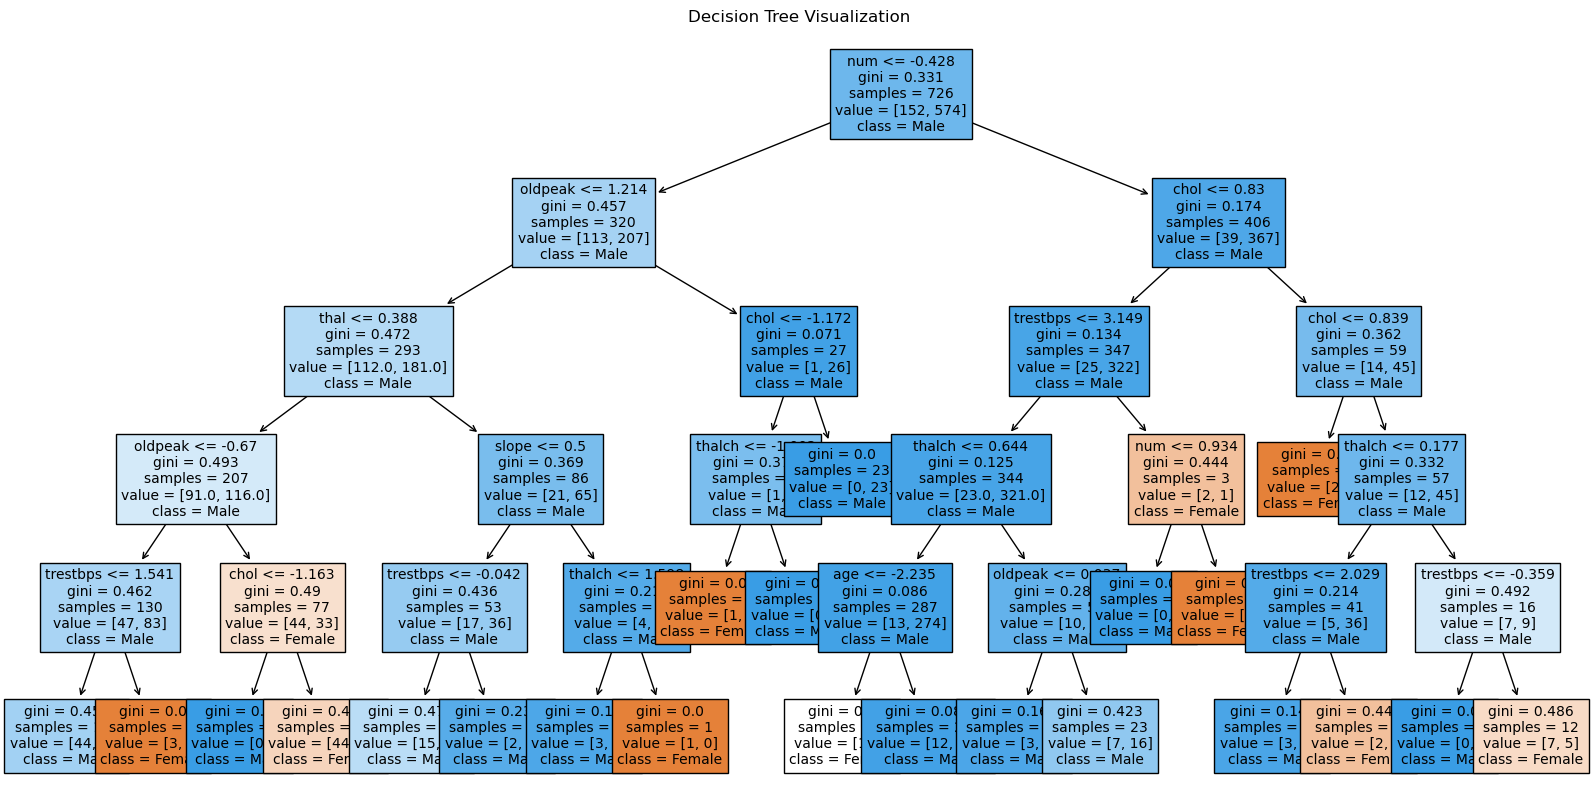


--- DONE ---


In [6]:
# >>> Robust inspector + Decision Tree pipeline for your uploaded Excel file
# Paste & run this in Jupyter. It will auto-detect sheet and target and run the DT pipeline.

import os, sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ---------- file paths to try ----------
candidates = [
    "/mnt/data/heart_disease (4).xlsx",
    r"C:\Users\abhin\Downloads\heart_disease (3).xlsx",
    r"C:\Users\abhin\Downloads\heart_disease (4).xlsx"
]

excel_path = None
for p in candidates:
    if os.path.exists(p):
        excel_path = p
        break

if excel_path is None:
    raise FileNotFoundError(f"Could not find the Excel file. Checked: {candidates}\n"
                            "Upload the file into your notebook environment or place it in one of these paths.")

print("Using file:", excel_path)

# ---------- list sheets ----------
xls = pd.ExcelFile(excel_path)
print("\nSheets found:", xls.sheet_names)

# ---------- inspect first 3 sheets (or all) ----------
sheet_infos = {}
for sheet in xls.sheet_names:
    try:
        tmp = xls.parse(sheet_name=sheet)
        sheet_infos[sheet] = {
            "shape": tmp.shape,
            "columns": list(tmp.columns),
            "dtypes": tmp.dtypes.apply(lambda x: str(x)).to_dict(),
            "head": tmp.head(8)
        }
        print(f"\n--- Sheet: '{sheet}' (shape {tmp.shape}) ---")
        display(tmp.head(6))
        print("dtypes:", tmp.dtypes.to_dict())
    except Exception as e:
        print(f"Failed to read sheet '{sheet}': {e}")

# ---------- choose best sheet automatically ----------
# Preference order:
# 1) sheet with a column named 'target' or 'Target' or 'diagnosis' or 'Outcome' or 'Disease'
# 2) sheet with any binary column (nunique==2)
# 3) sheet with the largest number of numeric columns

best_sheet = None
best_df = None

for sheet in xls.sheet_names:
    try:
        df_sheet = xls.parse(sheet_name=sheet)
        # drop fully empty columns
        df_sheet = df_sheet.loc[:, df_sheet.notna().any(axis=0)]
        cols = [c for c in df_sheet.columns]
        lower_cols = [c.lower() for c in cols]
        # check common target names
        for tname in ['target', 'target_col', 'outcome', 'diagnosis', 'disease', 'result', 'response', 'drug response', 'drugresponse']:
            if tname.lower() in lower_cols:
                best_sheet = sheet
                best_df = df_sheet
                reason = f"found column name matching '{tname}'"
                break
        if best_sheet:
            break
        # find binary columns
        bin_cols = [c for c in df_sheet.columns if df_sheet[c].nunique(dropna=False)==2]
        if bin_cols and best_sheet is None:
            best_sheet = sheet
            best_df = df_sheet
            reason = f"auto-picked because it has binary column(s): {bin_cols[:3]}"
            break
    except Exception:
        continue

# if still none, pick sheet with most numeric columns
if best_sheet is None:
    best_count = -1
    for sheet in xls.sheet_names:
        df_sheet = xls.parse(sheet_name=sheet)
        df_sheet = df_sheet.loc[:, df_sheet.notna().any(axis=0)]
        num_count = len(df_sheet.select_dtypes(include=[np.number]).columns)
        if num_count > best_count:
            best_count = num_count
            best_sheet = sheet
            best_df = df_sheet
            reason = f"picked sheet with most numeric columns ({best_count})"
            
print("\nSelected sheet:", best_sheet)
print("Reason:", reason)
print("Selected shape:", best_df.shape)
display(best_df.head(6))
print("\nColumn names:", list(best_df.columns))
print("\nDtypes:")
display(best_df.dtypes)

# ---------- prepare dataframe ----------
df = best_df.copy()

# drop fully empty columns and rows with all NaNs
df = df.dropna(how='all', axis=1)
df = df.dropna(how='all', axis=0)

# try to coerce obvious numeric-like columns (remove commas)
for c in df.columns:
    if df[c].dtype == object:
        # try numeric coercion
        coerced = pd.to_numeric(df[c].astype(str).str.replace(',', '').str.strip(), errors='coerce')
        # if majority convertable, replace
        if coerced.notna().sum() / max(1, len(coerced)) > 0.7:
            df[c] = coerced

print("\nAfter coercion, dtypes:")
display(df.dtypes)

# ---------- detect target ----------
possible_targets = [c for c in df.columns if str(c).lower() in 
                    ['target','target_col','outcome','diagnosis','disease','result','response','drug response','drugresponse']]
target_col = None
for t in possible_targets:
    if t in df.columns:
        target_col = t
        print("Using target found by name:", target_col)
        break

if target_col is None:
    # find any binary column
    binary_cols = [c for c in df.columns if df[c].nunique(dropna=False)==2]
    if binary_cols:
        target_col = binary_cols[0]
        print("Auto-detected binary column as target:", target_col)
    else:
        # create synthetic target if 'age' exists and numeric
        if 'age' in df.columns and pd.api.types.is_numeric_dtype(df['age']):
            median_age = df['age'].median()
            df['target'] = (df['age'] > median_age).astype(int)
            target_col = 'target'
            print(f"No target found. Created synthetic 'target' = (age > {median_age}).")
        else:
            # last resort: cannot proceed
            raise KeyError("No suitable target column found and could not create synthetic target. "
                           "Please tell me which column should be the label or upload the correct sheet.")

print("\nFinal target column being used:", target_col)
print("Target distribution:")
display(df[target_col].value_counts())

# ---------- prepare X, y ----------
X = df.drop(columns=[target_col]).copy()
y = df[target_col].copy()

# encode non-numeric features
for col in X.columns:
    if not pd.api.types.is_numeric_dtype(X[col]):
        X[col] = X[col].astype(str)
        X[col] = LabelEncoder().fit_transform(X[col])

print("\nFinal feature matrix shape:", X.shape)
print("Example features (first 5 cols):")
display(X.iloc[:, :5].head())

# ---------- safety checks ----------
if X.shape[1] == 0:
    raise ValueError("No features available after preprocessing. Provide dataset with feature columns.")
if X.shape[0] < 10:
    print("Warning: very few rows (<10) after preprocessing; model results may be unreliable.")

# ---------- train/test split ----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y if len(np.unique(y))>1 else None
)

print("\nTrain/Test shapes:", X_train.shape, X_test.shape)

# ---------- scaling ----------
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# ---------- fit Decision Tree ----------
model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
model.fit(X_train_s, y_train)
y_pred = model.predict(X_test_s)

# ---------- evaluation ----------
acc = accuracy_score(y_test, y_pred)
print("\nAccuracy:", round(acc,4))
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---------- feature importance ----------
feat_names = X.columns
importances = model.feature_importances_
fi_df = pd.DataFrame({'feature': feat_names, 'importance': importances}).sort_values('importance', ascending=False)
print("\nFeature importances:")
display(fi_df)

if len(fi_df) > 0:
    plt.figure(figsize=(8, max(4, 0.3*len(fi_df))))
    sns.barplot(x='importance', y='feature', data=fi_df)
    plt.title("Feature Importance")
    plt.tight_layout()
    plt.show()

# ---------- tree plot ----------
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=feat_names, class_names=[str(c) for c in np.unique(y)], filled=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

print("\n--- DONE ---")
